# Census Income Project
## Problem Statement:
This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

## Description of fnlwgt (final weight)
The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

A single cell estimate of the population 16+ for each state.

Controls for Hispanic Origin by age and sex.

Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.

To download the dataset, use the link given below.

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

### Read Dataset

In [2]:
df = pd.read_csv('census_income.csv')
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


Dataset has 32560 rows and 15 columns

Dataset both categorical and numerical data in the dataset.

There are two unique values in the target column <=50K and >50K. We can say that whether the person has annual income <=50K or >50K.

The target variable that is 'Income' has two classes of data, hence this is a classification data. We will look more into the dataset in the EDA part

### Exploratory Data Analysis

In [3]:
df.shape

(32560, 15)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


This analysis shows that the datset has both object and integer datatypes. We will look into the datatypes and treat it accordingly.

In [5]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

We can see that there is no null value in the Dataset

### Visualization

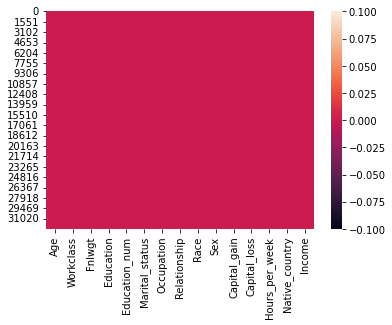

In [6]:
sns.heatmap(df.isnull());

We can clearly see that the dataset has no null values

In [7]:
df.nunique().to_frame('Number of Unique Values')

,Number of Unique Values
Age,73
Workclass,9
Fnlwgt,21647
Education,16
Education_num,16
Marital_status,7
Occupation,15
Relationship,6
Race,5
Sex,2


We can see here the number of unique values in each columns

In [8]:
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

In [9]:
for i in df.columns:
    print(f'_______________{i}_________________\n')
    print(df[i].value_counts())
    print('------------------------------------\n')
    

_______________Age_________________

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: Age, Length: 73, dtype: int64
------------------------------------

_______________Workclass_________________

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64
------------------------------------

_______________Fnlwgt_________________

164190    13
203488    13
123011    13
148995    12
126675    12
          ..
325573     1
140176     1
318264     1
329205     1
257302     1
Name: Fnlwgt, Length: 21647, dtype: int64
------------------------------------

_______________Education_________________

 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11t

From this analysis we see the following points

1.We have 29849, zero value in capital gain and 31041, zero values in capital loss, which is 90% of the data, so we can consider dropping them.

2.Also we have ? value in workclass, occupation and Native_country, so we need to impute this value.

In [10]:
df.drop(['Capital_gain','Capital_loss'],axis=1,inplace=True)

In [11]:
df['Workclass'] = df.Workclass.str.replace('?','Private')
df['Occupation'] = df.Occupation.str.replace('?','Prof-specialty')
df['Native_country'] = df.Native_country.str.replace('?','United-States')

In [12]:
df['Workclass'].value_counts()

 Private             24532
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

In [13]:
df['Occupation'].value_counts()

 Prof-specialty       5983
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64

In [14]:
df['Native_country'].value_counts()

 United-States                 29752
 Mexico                          643
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 France                           29
 

In [15]:
df.Workclass = df.Workclass.replace([' Local-gov',' State-gov',' Federal-gov'],' Govt-Sector')
df.Workclass = df.Workclass.replace([' Private',' Self-emp-not-inc',' Self-emp-inc'],' Pvt-sector')
df.Workclass = df.Workclass.replace([' Without-pay',' Never-worked'],'Not-working')

In [16]:
df['Workclass'].value_counts()

 Pvt-sector     28189
 Govt-Sector     4350
Not-working        21
Name: Workclass, dtype: int64

In [17]:
df["Education"]=df["Education"].replace([' Preschool',' 1st-4th',' 5th-6th',' 7th-8th',' 9th',' 10th',' 11th',' 12th'],'School')
df["Education"]=df["Education"].replace([' HS-grad',' Prof-school'],' High-School')
df["Education"]=df["Education"].replace([' Some-college',' Assoc-voc',' Assoc-acdm'],' Secondary-School')
df["Education"]=df["Education"].replace([' Bachelors',],' Under_Graduation')
df["Education"]=df["Education"].replace([' Masters'],'Post_Graduation')
df["Education"]=df["Education"].replace([' Doctorate'],' PhD')

In [18]:
df['Education'].value_counts()

 High-School         11077
 Secondary-School     9740
 Under_Graduation     5354
School                4253
Post_Graduation       1723
 PhD                   413
Name: Education, dtype: int64

In [19]:
df["Marital_status"]=df["Marital_status"].replace([' Married-civ-spouse',' Married-AF-spouse'],' Married')
df["Marital_status"]=df["Marital_status"].replace([' Never-married'],' Single')
df["Marital_status"]=df["Marital_status"].replace([' Divorced',' Widowed',' Separated',' Married-spouse-absent',],' Others')

In [20]:
df['Marital_status'].value_counts()

 Married    14999
 Single     10682
 Others      6879
Name: Marital_status, dtype: int64

In [21]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
0,50,Pvt-sector,83311,Under_Graduation,13,Married,Exec-managerial,Husband,White,Male,13,United-States,<=50K
1,38,Pvt-sector,215646,High-School,9,Others,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
2,53,Pvt-sector,234721,School,7,Married,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
3,28,Pvt-sector,338409,Under_Graduation,13,Married,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K
4,37,Pvt-sector,284582,Post_Graduation,14,Married,Exec-managerial,Wife,White,Female,40,United-States,<=50K


In [22]:
df['Income'].value_counts()

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

In [23]:
df.describe()

,Age,Fnlwgt,Education_num,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,40.437469
std,13.640642,1.055498e+05,2.572709,12.347618
min,17.000000,1.228500e+04,1.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99.000000


This gives the statistical information of the dataset. The summary of this dataset looks perfect since there is no negative/ invalid values present.

### Checking the 'categorical' and 'numerical columns'

In [24]:
cat_col = []
num_col = []
for i in df.dtypes.index:
    if df.dtypes[i] =='object':
        cat_col.append(i)
    elif df.dtypes[i] != 'object':
        num_col.append(i)

In [25]:
cat_col

['Workclass',
 'Education',
 'Marital_status',
 'Occupation',
 'Relationship',
 'Race',
 'Sex',
 'Native_country',
 'Income']

In [26]:
num_col

['Age', 'Fnlwgt', 'Education_num', 'Hours_per_week']

### Data Visualization

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64


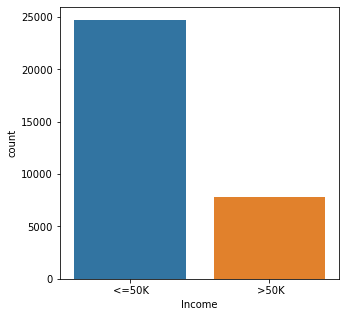

In [27]:
print(df['Income'].value_counts())
plt.figure(figsize=(5,5))
sns.countplot(df['Income']);

Here we can clearly see that the target is imbalanced and we will have to balance it

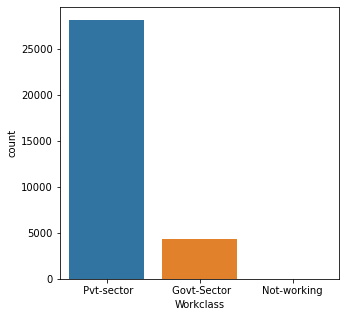

In [28]:
plt.figure(figsize=(5,5))
sns.countplot(df['Workclass'])
plt.show()

Here we can see that, the maximum population is working in the private sector, followed by govt sector and none unemployed.

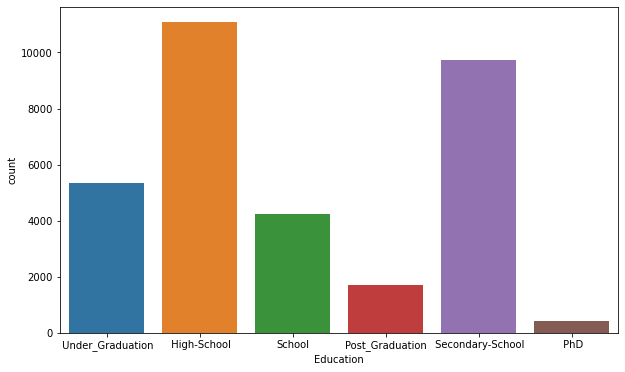

In [29]:
plt.figure(figsize=(10,6))
sns.countplot(df['Education']);

Based on this maximum people has deductions till High School, followed by Secondary School

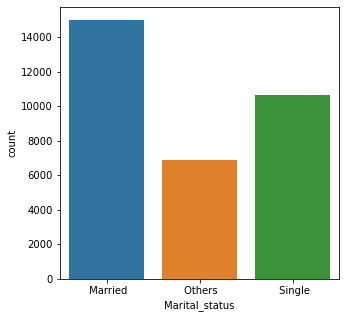

In [30]:
plt.figure(figsize=(5,5))
sns.countplot(df['Marital_status']);

Based on this maximum population Married followed by Single

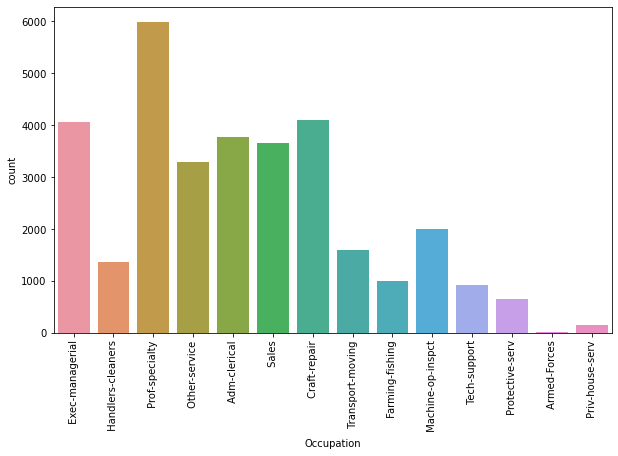

In [31]:
plt.figure(figsize=(10,6))
sns.countplot(df["Occupation"])
plt.xticks(rotation=90);

Maximum count is for prof-speciality and least count is for Armed Forces

### Checking the data is distributed

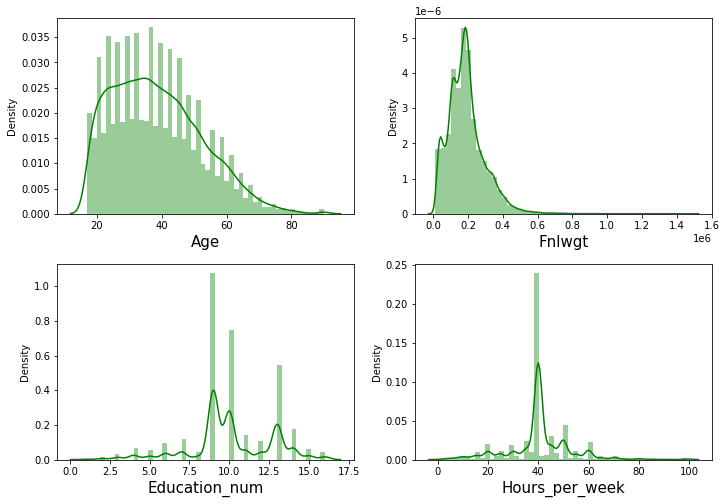

In [32]:
plt.figure(figsize=(10,10), facecolor='white')
plotnumber=1
for columns in num_col:
    if plotnumber<=5:
        ax=plt.subplot(3,2,plotnumber)
        sns.distplot(df[columns], color='green')
        plt.xlabel(columns, fontsize=15)
    plotnumber+=1
plt.tight_layout()

We can clearly identify that the data in the dataset is not normal. We have 'Age' which is skewed right, Final weight is also skewed right, education is scattered ad hours is also scattered with no skewness

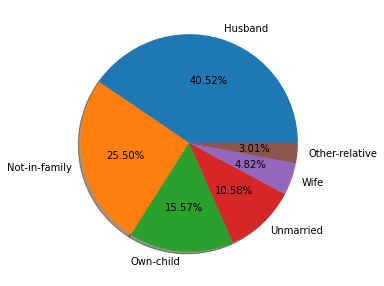

In [33]:
labels='Husband','Not-in-family','Own-child', 'Unmarried','Wife','Other-relative'
fig, ax = plt.subplots(figsize=(5,5))
ax.pie(df['Relationship'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True)
plt.show()

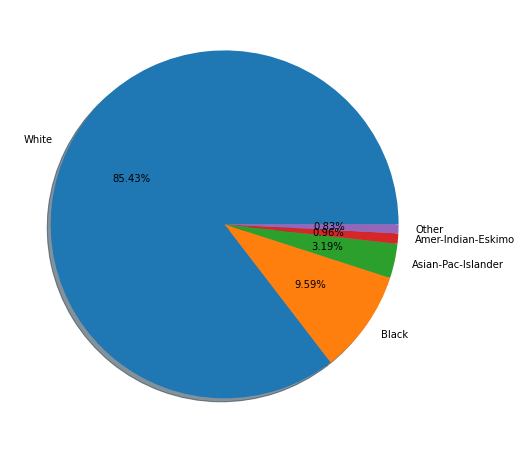

In [34]:
labels='White','Black','Asian-Pac-Islander', 'Amer-Indian-Eskimo','Other'
fig, ax = plt.subplots(figsize=(8,8))
ax.pie(df['Race'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True)
plt.show()

White family groups have high count of around 85% and Other race have least count around 0.83%.

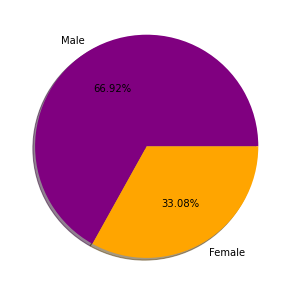

In [35]:
labels='Male','Female'
fig, ax = plt.subplots(figsize=(5,8))
colors = ["purple","orange"]
ax.pie(df['Sex'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True,colors=colors)
plt.show()

The count of Male is high and has around 66% and only 33% of females are there.

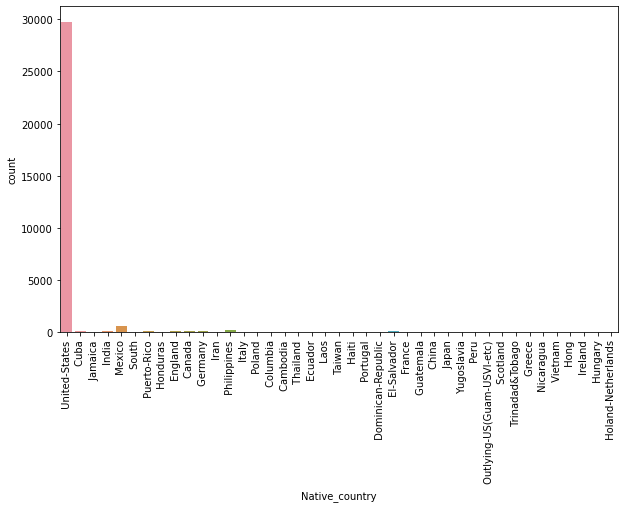

In [36]:
plt.figure(figsize=(10,6))
sns.countplot(df["Native_country"])
plt.xticks(rotation=90)
plt.show()

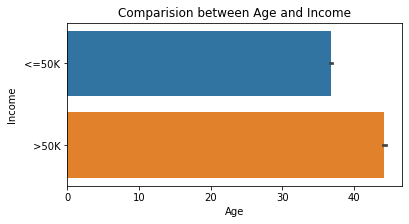

In [37]:
plt.figure(figsize=[6,3])
plt.title('Comparision between Age and Income')
sns.barplot(df['Age'],df["Income"]);

The older age group has income more then 50K

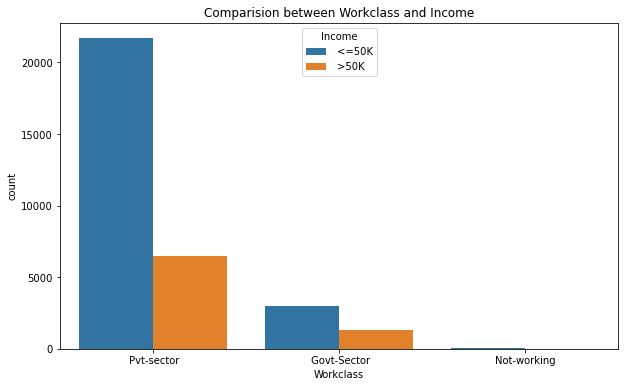

In [38]:
plt.figure(figsize=(10,6))
sns.countplot(df["Workclass"],hue=df["Income"])
plt.title("Comparision between Workclass and Income");

The people who are working in the private sectors have the income <=50K and the only few of the people in the same sector have income >50K. Also the people who never worked they don't have the income.

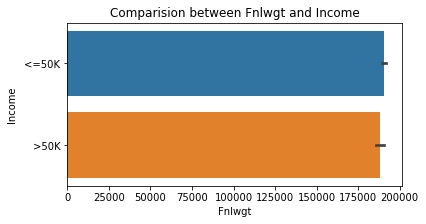

In [39]:
plt.figure(figsize=[6,3])
plt.title('Comparision between Fnlwgt and Income')
sns.barplot(df['Fnlwgt'],df["Income"]);

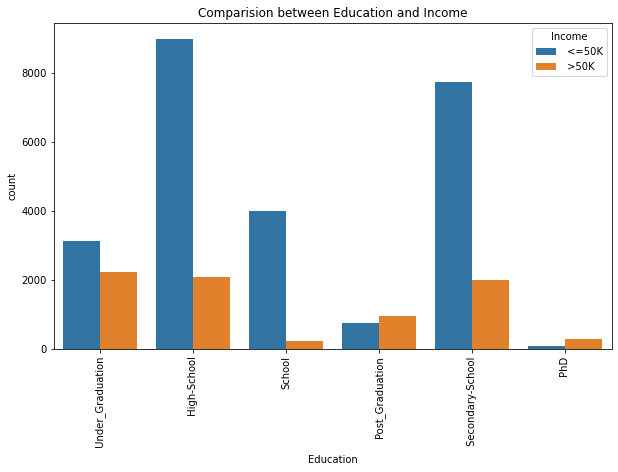

In [40]:
plt.figure(figsize=(10,6))
sns.countplot(df["Education"],hue=df["Income"])
plt.title("Comparision between Education and Income")
plt.xticks(rotation=90)
plt.show()

The people who completed theie high school have income <=50K followed by the people who done their Secondary School. Also the people who done their Graduation they are earning more income that is >50K.

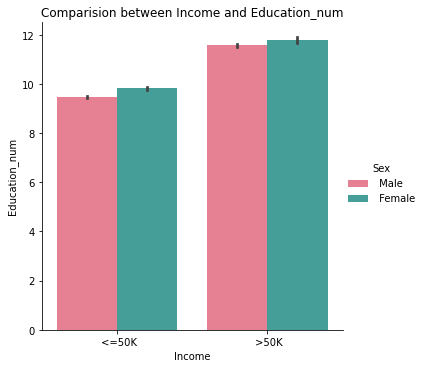

In [41]:
sns.catplot(x='Income',y='Education_num', data=df,kind='bar',hue="Sex",palette="husl")
plt.title('Comparision between Income and Education_num')
plt.show()

<Figure size 72x216 with 0 Axes>

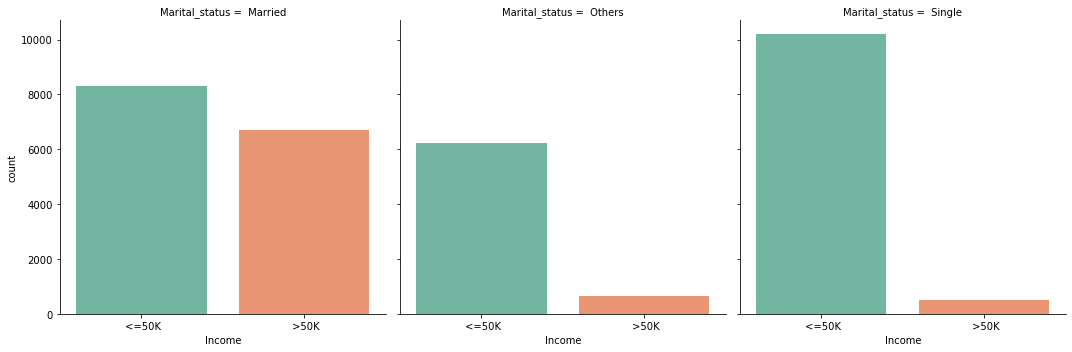

In [42]:
plt.figure(figsize=(1,3))
sns.catplot(x='Income',col='Marital_status',data=df,kind='count',palette="Set2");
plt.show()

Married population have the more population with income >50K compared to others and single.

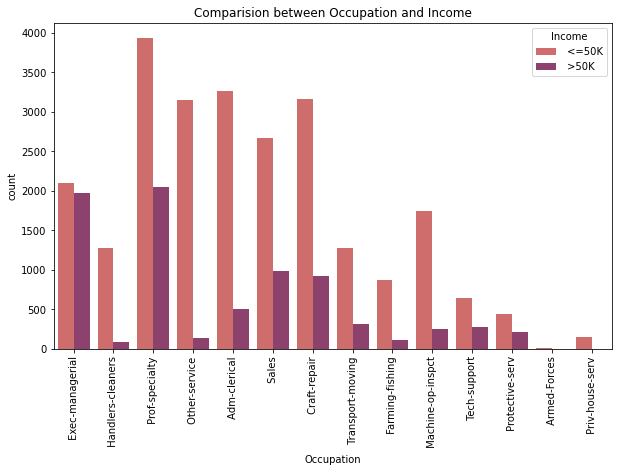

In [43]:
plt.figure(figsize=(10,6))
sns.countplot(df["Occupation"],hue=df["Income"],palette="flare" )
plt.title("Comparision between Occupation and Income")
plt.xticks(rotation=90)
plt.show()

Population belonging to Prof-speciality and Exec-managerial have the income more than 50K.

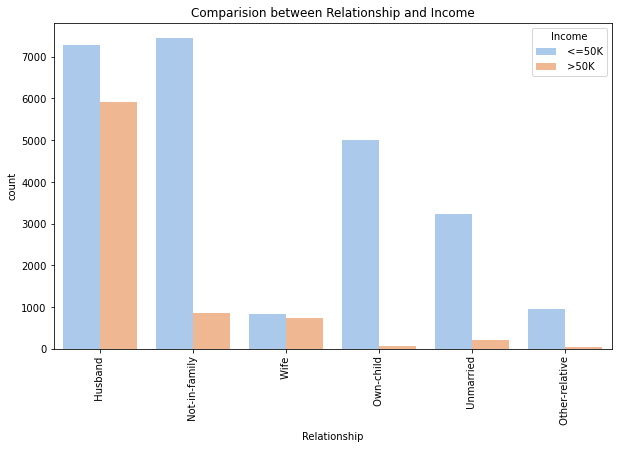

In [44]:
plt.figure(figsize=(10,6))
sns.countplot(df["Relationship"],hue=df["Income"],data=df,palette="pastel")
plt.title("Comparision between Relationship and Income")
plt.xticks(rotation=90)
plt.show()

Husband have the high population for income >50k

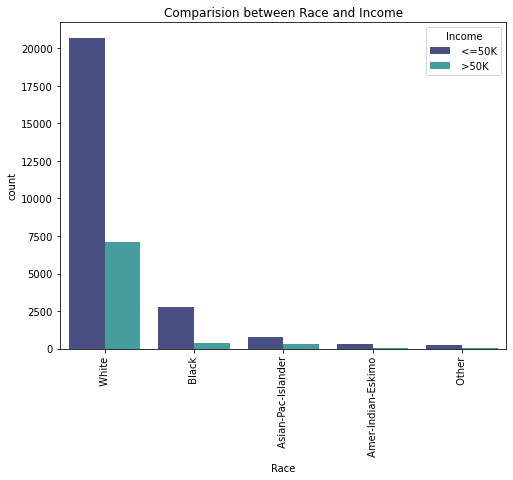

In [45]:
plt.figure(figsize=(8,6))
sns.countplot(df['Race'],hue=df['Income'],data=df,palette="mako")
plt.title("Comparision between Race and Income")
plt.xticks(rotation=90)
plt.show()

White popluation have high number of population with income >50K

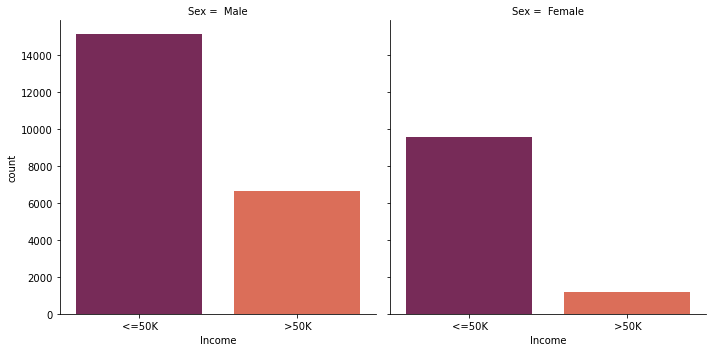

In [46]:
sns.catplot(x='Income',col='Sex',data=df,kind='count',palette="rocket")
plt.show()

The income of Male is >50 compared to the female.

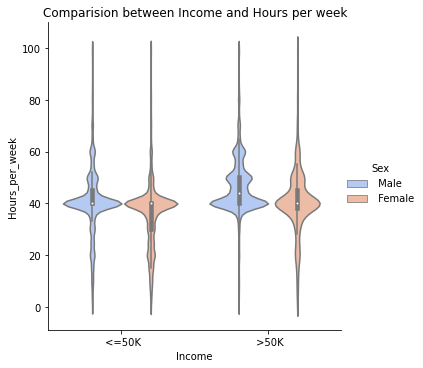

In [47]:
sns.catplot(x='Income',y='Hours_per_week', data=df,kind='violin',hue="Sex",palette="coolwarm");
plt.title('Comparision between Income and Hours per week')
plt.show()

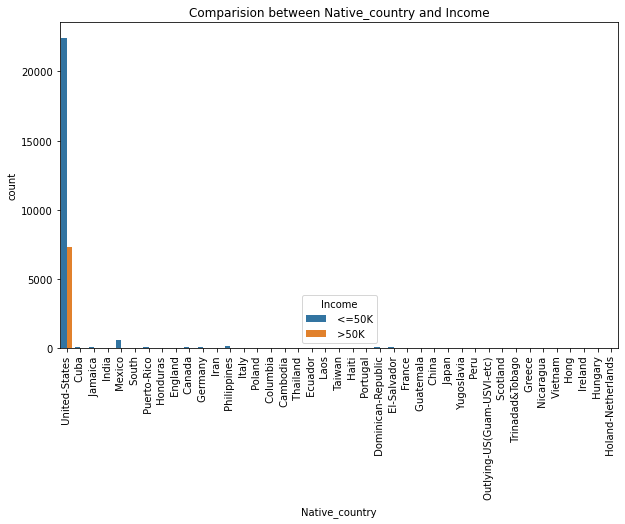

In [48]:
plt.figure(figsize=(10,6))
sns.countplot(df["Native_country"],hue=df["Income"] )
plt.title("Comparision between Native_country and Income")
plt.xticks(rotation=90)
plt.show()

People in United States have more population with Income >50k

### Outliers Identifying

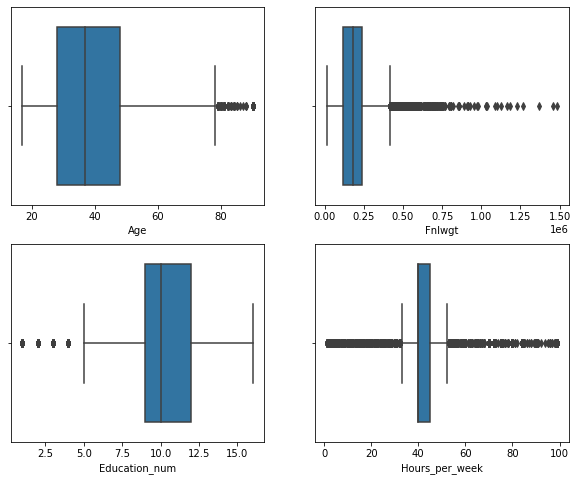

In [49]:
plt.figure(figsize=(10,8),facecolor='white')
plotnumber = 1
for column in num_col:
    if plotnumber<=4:
        ax = plt.subplot(2,2,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize=10)
    plotnumber+=1;

The outliers present in all the columns we will remove it using Zscore method.

In [51]:
import scipy as stats
from scipy.stats import zscore

features = df[['Age','Fnlwgt','Education_num','Hours_per_week']]
z=np.abs(zscore(features))

z

,Age,Fnlwgt,Education_num,Hours_per_week
0,0.837097,1.008742,1.134779,2.222120
1,0.042640,0.245046,0.420027,0.035430
2,1.057031,0.425770,1.197429,0.035430
3,0.775755,1.408146,1.134779,0.035430
4,0.115952,0.898170,1.523480,0.035430
...,...,...,...,...
32555,0.849066,0.639710,0.746077,0.197407
32556,0.103982,0.335466,0.420027,0.035430
32557,1.423589,0.358811,0.420027,0.035430
32558,1.215624,0.110927,0.420027,1.655200


In [52]:
new_df = df[(z<3).all(axis=1)]
new_df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
0,50,Pvt-sector,83311,Under_Graduation,13,Married,Exec-managerial,Husband,White,Male,13,United-States,<=50K
1,38,Pvt-sector,215646,High-School,9,Others,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
2,53,Pvt-sector,234721,School,7,Married,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
3,28,Pvt-sector,338409,Under_Graduation,13,Married,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K
4,37,Pvt-sector,284582,Post_Graduation,14,Married,Exec-managerial,Wife,White,Female,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Pvt-sector,257302,Secondary-School,12,Married,Tech-support,Wife,White,Female,38,United-States,<=50K
32556,40,Pvt-sector,154374,High-School,9,Married,Machine-op-inspct,Husband,White,Male,40,United-States,>50K
32557,58,Pvt-sector,151910,High-School,9,Others,Adm-clerical,Unmarried,White,Female,40,United-States,<=50K
32558,22,Pvt-sector,201490,High-School,9,Single,Adm-clerical,Own-child,White,Male,20,United-States,<=50K


### Checking the skewness of the dataset

In [53]:
new_df.skew().sort_values()

Hours_per_week   -0.341724
Education_num    -0.159752
Age               0.472279
Fnlwgt            0.634828
dtype: float64

There is skewness only in the Final Weight column

### Removing the skewness 

In [55]:
new_df['Fnlwgt'] = np.cbrt(df['Fnlwgt'])

In [56]:
new_df.skew().sort_values()

Fnlwgt           -0.376609
Hours_per_week   -0.341724
Education_num    -0.159752
Age               0.472279
dtype: float64

<AxesSubplot:xlabel='Fnlwgt', ylabel='Density'>

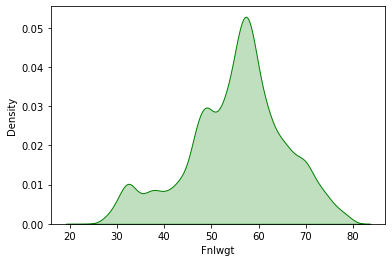

In [57]:
sns.distplot(new_df["Fnlwgt"],color="green",kde_kws={"shade": True},hist=False);

### Encoding

In [58]:
categorical_col = ['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country', 'Income']

from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
new_df[categorical_col]= new_df[categorical_col].apply(LE.fit_transform)

In [59]:
new_df[categorical_col]

,Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Native_country,Income
0,1,3,0,3,0,4,1,38,0
1,1,0,1,5,1,4,1,38,0
2,1,5,0,5,0,2,1,38,0
3,1,3,0,9,5,2,0,4,0
4,1,4,0,3,5,4,0,38,0
...,...,...,...,...,...,...,...,...,...
32555,1,2,0,12,5,4,0,38,0
32556,1,0,0,6,0,4,1,38,1
32557,1,0,1,0,4,4,0,38,0
32558,1,0,2,0,3,4,1,38,0


Categorical columns has been encoded and ready for modelling. New dataset has 31461 rows and 9 columns

### Checking Co-relation

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5]),
 [Text(0, 0.5, 'Age'),
  Text(0, 1.5, 'Workclass'),
  Text(0, 2.5, 'Fnlwgt'),
  Text(0, 3.5, 'Education'),
  Text(0, 4.5, 'Education_num'),
  Text(0, 5.5, 'Marital_status'),
  Text(0, 6.5, 'Occupation'),
  Text(0, 7.5, 'Relationship'),
  Text(0, 8.5, 'Race'),
  Text(0, 9.5, 'Sex'),
  Text(0, 10.5, 'Hours_per_week'),
  Text(0, 11.5, 'Native_country'),
  Text(0, 12.5, 'Income')])

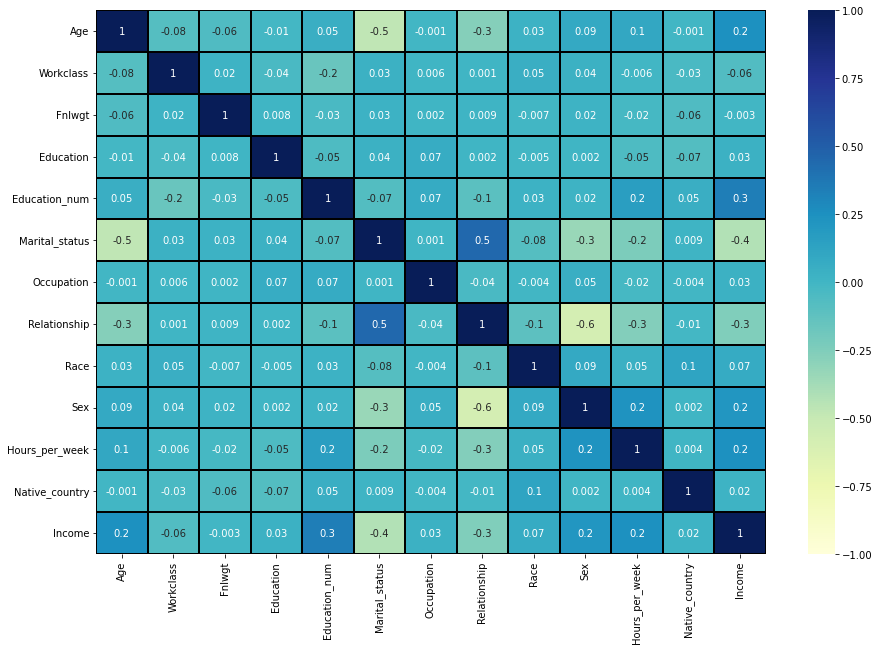

In [61]:
corr=new_df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(new_df.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.1g', annot = True, linecolor="black",annot_kws={'size':10},cmap="YlGnBu")
plt.yticks(rotation=0)

In [62]:
corr['Income'].sort_values(ascending=False)

Income            1.000000
Education_num     0.337595
Age               0.248351
Hours_per_week    0.242383
Sex               0.216665
Race              0.072451
Occupation        0.034612
Education         0.034278
Native_country    0.017698
Fnlwgt           -0.002780
Workclass        -0.062963
Relationship     -0.251506
Marital_status   -0.425904
Name: Income, dtype: float64

In [63]:
X = new_df.drop('Income',axis=1)
Y = new_df['Income']

### Standard Scalarization

In [64]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country
0,0.875057,0.392103,-1.102052,0.621080,1.154324,-0.990371,-0.784335,-0.903178,0.391304,0.706601,-2.424121,0.254062
1,-0.025350,0.392103,0.464976,-1.149684,-0.459657,0.147158,-0.282327,-0.281938,0.391304,0.706601,-0.008364,0.254062
2,1.100158,0.392103,0.630260,1.801589,-1.266647,-0.990371,-0.282327,-0.903178,-1.969806,0.706601,-0.008364,0.254062
3,-0.775689,0.392103,1.399791,0.621080,1.154324,-0.990371,0.721690,2.203019,-1.969806,-1.415226,-0.008364,-5.457546
4,-0.100384,0.392103,1.023711,1.211335,1.557819,-0.990371,-0.784335,2.203019,0.391304,-1.415226,-0.008364,0.254062
...,...,...,...,...,...,...,...,...,...,...,...,...
31456,-0.850723,0.392103,0.814728,0.030825,0.750829,-0.990371,1.474703,2.203019,0.391304,-1.415226,-0.187309,0.254062
31457,0.124718,0.392103,-0.143169,-1.149684,-0.459657,-0.990371,-0.031323,-0.903178,0.391304,0.706601,-0.008364,0.254062
31458,1.475327,0.392103,-0.170768,-1.149684,-0.459657,0.147158,-1.537348,1.581780,0.391304,-1.415226,-0.008364,0.254062
31459,-1.225892,0.392103,0.335900,-1.149684,-0.459657,1.284688,-1.537348,0.960541,0.391304,0.706601,-1.797814,0.254062


### Oversampling (SMOTE)

In [66]:
from imblearn.over_sampling import SMOTE
SM = SMOTE()
X, Y = SM.fit_resample(X,Y)

In [67]:
Y.value_counts()

0    23853
1    23853
Name: Income, dtype: int64

In [68]:
new_df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
0,50,1,43.675121,3,13,0,3,0,4,1,13,38,0
1,38,1,59.967204,0,9,1,5,1,4,1,40,38,0
2,53,1,61.685627,5,7,0,5,0,2,1,40,38,0
3,28,1,69.686283,3,13,0,9,5,2,0,40,4,0
4,37,1,65.776255,4,14,0,3,5,4,0,40,38,0


### Model

In [71]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,mean_absolute_error,mean_squared_error
maxAccu=0
maxRS=0

for i in range(1,200):
    X_train,X_test, Y_train, Y_test=train_test_split(X,Y,test_size=.30, random_state=i)
    RFC=RandomForestClassifier()
    RFC.fit(X_train,Y_train)
    predRFC=RFC.predict(X_test)
    acc=accuracy_score(Y_test,predRFC)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.8853409726103969  on Random_state  43


### Creating Train_Test_Split

In [74]:
X_train,X_test,Y_train,Y_test =train_test_split(X,Y,test_size=.3,random_state=maxRS)

### Logistic Regression

In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score,confusion_matrix,classification_report

LOR = LogisticRegression()
LOR.fit(X_train,Y_train)

# [Prediction]
predLOR = LOR.predict(X_test)
print('R2 Score:',r2_score(Y_test,predLOR))

# Mean Absolute Error(MAE)
print('Mean Absolute Error',mean_absolute_error(Y_test,predLOR))

# Mean Squared Error(MSE)
print('Mean Squared Error',mean_squared_error(Y_test,predLOR))

# Root Mean Squared Error (RMSE)
print('Root Mean Squared Error',np.sqrt(mean_squared_error(Y_test,predLOR)))

print("-----------------------------------------------------")
# Accuracy Score
print(accuracy_score(Y_test, predLOR))
print("-----------------------------------------------------")
# Confusion Matrix
print(confusion_matrix(Y_test, predLOR))
print("-----------------------------------------------------")
# Classification Report
print(classification_report(Y_test,predLOR))

R2 Score: 0.1760515470450562
Mean Absolute Error 0.20598099496925656
Mean Squared Error 0.20598099496925656
Root Mean Squared Error 0.4538512916906336
-----------------------------------------------------
0.7940190050307434
-----------------------------------------------------
[[5342 1775]
 [1173 6022]]
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.82      0.75      0.78      7117
           1       0.77      0.84      0.80      7195

    accuracy                           0.79     14312
   macro avg       0.80      0.79      0.79     14312
weighted avg       0.80      0.79      0.79     14312



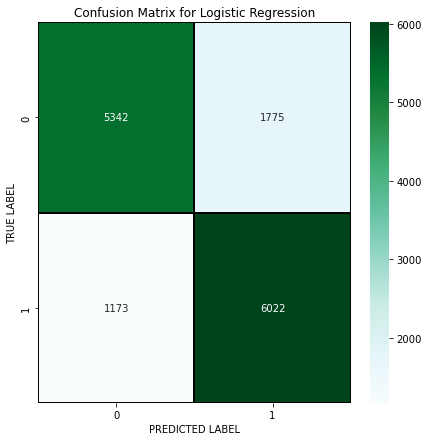

In [80]:
cm = confusion_matrix(Y_test,predLOR)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

### Decission Tree Classifier

In [81]:
from sklearn.tree import DecisionTreeClassifier

# Checking accuracy for Decision Tree Classifier
DTC = DecisionTreeClassifier()
DTC.fit(X_train,Y_train)

# [Prediction]
predDTC = DTC.predict(X_test)
print('R2 Score:',r2_score(Y_test,predDTC))

# Mean Absolute Error(MAE)
print('Mean Absolute Error',mean_absolute_error(Y_test,predDTC))

# Mean Squared Error(MSE)
print('Mean Squared Error',mean_squared_error(Y_test,predDTC))

# Root Mean Squared Error (RMSE)
print('Root Mean Squared Error',np.sqrt(mean_squared_error(Y_test,predDTC)))
print("-----------------------------------------------------")
# Accuracy Score
print('Accuracy Score: ',accuracy_score(Y_test, predDTC))
print("-----------------------------------------------------")
# Confusion Matrix
print('Confusion Matrix:\n',confusion_matrix(Y_test, predDTC))
print("-----------------------------------------------------")
# Classification Report
print(classification_report(Y_test,predDTC)) 

R2 Score: 0.3362016364423367
Mean Absolute Error 0.16594466182224707
Mean Squared Error 0.16594466182224707
Root Mean Squared Error 0.4073630589808642
-----------------------------------------------------
Accuracy Score:  0.8340553381777529
-----------------------------------------------------
Confusion Matrix:
 [[5878 1239]
 [1136 6059]]
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.84      0.83      0.83      7117
           1       0.83      0.84      0.84      7195

    accuracy                           0.83     14312
   macro avg       0.83      0.83      0.83     14312
weighted avg       0.83      0.83      0.83     14312



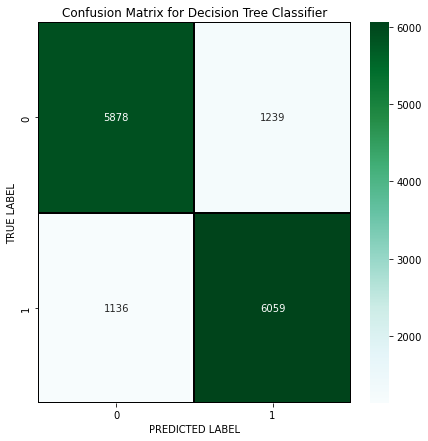

In [83]:
cm = confusion_matrix(Y_test,predDTC)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()

### Random Forest Classifier

In [84]:
from sklearn.ensemble import RandomForestClassifier
# Checking accuracy for Random Forest Classifier
RFC = RandomForestClassifier()
RFC.fit(X_train,Y_train)

# [Prediction]
predRFC = RFC.predict(X_test)
print('R2 Score:',r2_score(Y_test,predRFC))

# Mean Absolute Error(MAE)
print('Mean Absolute Error',mean_absolute_error(Y_test,predRFC))

# Mean Squared Error(MSE)
print('Mean Squared Error',mean_squared_error(Y_test,predRFC))

# Root Mean Squared Error (RMSE)
print('Root Mean Squared Error',np.sqrt(mean_squared_error(Y_test,predRFC)))
print("-----------------------------------------------------")
# Accuracy Score
print('Accuracy Score: ',accuracy_score(Y_test, predRFC))
print("-----------------------------------------------------")
# Confusion Matrix
print('Confusion Matrix:\n',confusion_matrix(Y_test, predRFC))
print("-----------------------------------------------------")
# Classification Report
print(classification_report(Y_test,predRFC))

R2 Score: 0.5301705056250812
Mean Absolute Error 0.11745388485187255
Mean Squared Error 0.11745388485187255
Root Mean Squared Error 0.3427154575619147
-----------------------------------------------------
Accuracy Score:  0.8825461151481274
-----------------------------------------------------
Confusion Matrix:
 [[6109 1008]
 [ 673 6522]]
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.90      0.86      0.88      7117
           1       0.87      0.91      0.89      7195

    accuracy                           0.88     14312
   macro avg       0.88      0.88      0.88     14312
weighted avg       0.88      0.88      0.88     14312



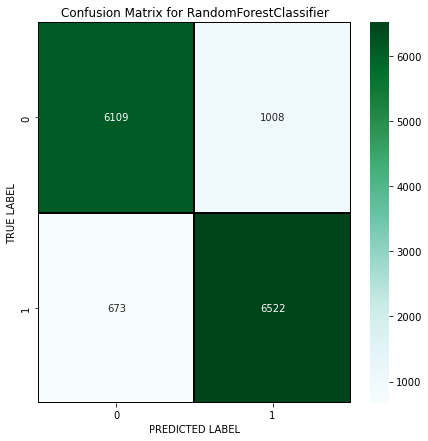

In [85]:
cm = confusion_matrix(Y_test,predRFC)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for RandomForestClassifier')
plt.show()

### KNeighborsClassifier

In [86]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier()
KNN.fit(X_train,Y_train)

# [Prediction]
predKNN = KNN.predict(X_test)
print('R2 Score:',r2_score(Y_test,predKNN))

# Mean Absolute Error(MAE)
print('Mean Absolute Error',mean_absolute_error(Y_test,predKNN))

# Mean Squared Error(MSE)
print('Mean Squared Error',mean_squared_error(Y_test,predKNN))

# Root Mean Squared Error (RMSE)
print('Root Mean Squared Error',np.sqrt(mean_squared_error(Y_test,predKNN)))
print("-----------------------------------------------------")
# Accuracy Score
print('Accuracy Score: ',accuracy_score(Y_test, predKNN))
print("-----------------------------------------------------")
# Confusion Matrix
print('Confusion Matrix:\n',confusion_matrix(Y_test, predKNN))
print("-----------------------------------------------------")
# Classification Report
print(classification_report(Y_test,predKNN))

R2 Score: 0.3591201483630644
Mean Absolute Error 0.16021520402459474
Mean Squared Error 0.16021520402459474
Root Mean Squared Error 0.400268914636891
-----------------------------------------------------
Accuracy Score:  0.8397847959754052
-----------------------------------------------------
Confusion Matrix:
 [[5382 1735]
 [ 558 6637]]
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.76      0.82      7117
           1       0.79      0.92      0.85      7195

    accuracy                           0.84     14312
   macro avg       0.85      0.84      0.84     14312
weighted avg       0.85      0.84      0.84     14312



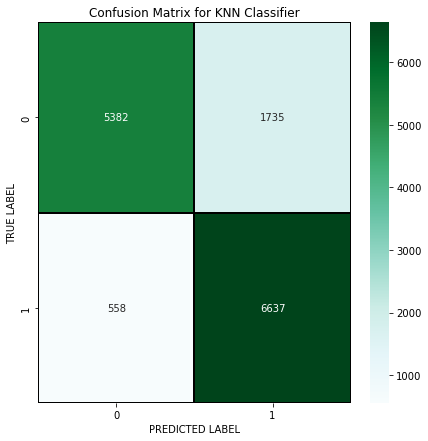

In [87]:
cm = confusion_matrix(Y_test,predKNN)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for KNN Classifier')
plt.show()

### Gradient Boosting Classifier

In [89]:
from xgboost import XGBClassifier
XGB = XGBClassifier()
XGB.fit(X_train,Y_train)

# [Prediction]
predXGB = XGB.predict(X_test)
print('R2 Score:',r2_score(Y_test,predXGB))

# Mean Absolute Error(MAE)
print('Mean Absolute Error',mean_absolute_error(Y_test,predXGB))

# Mean Squared Error(MSE)
print('Mean Squared Error',mean_squared_error(Y_test,predXGB))

# Root Mean Squared Error (RMSE)
print('Root Mean Squared Error',np.sqrt(mean_squared_error(Y_test,predXGB)))
print("-----------------------------------------------------")
# Accuracy Score
print('Accuracy Score: ',accuracy_score(Y_test, predXGB))
print("-----------------------------------------------------")
# Confusion Matrix
print('Confusion Matrix:\n',confusion_matrix(Y_test, predXGB))
print("-----------------------------------------------------")
# Classification Report
print(classification_report(Y_test,predXGB))

R2 Score: 0.5435862199201413
Mean Absolute Error 0.11410005589714925
Mean Squared Error 0.11410005589714925
Root Mean Squared Error 0.33778699782133303
-----------------------------------------------------
Accuracy Score:  0.8858999441028508
-----------------------------------------------------
Confusion Matrix:
 [[6273  844]
 [ 789 6406]]
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.89      0.88      0.88      7117
           1       0.88      0.89      0.89      7195

    accuracy                           0.89     14312
   macro avg       0.89      0.89      0.89     14312
weighted avg       0.89      0.89      0.89     14312



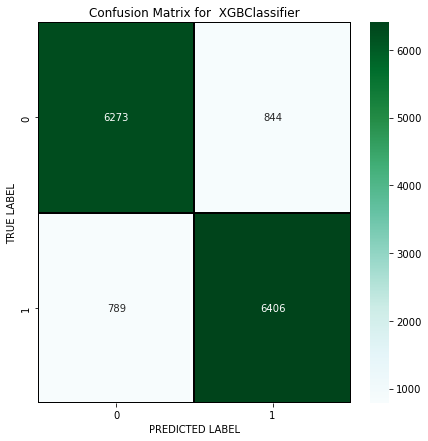

In [90]:
cm = confusion_matrix(Y_test,predXGB)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for  XGBClassifier')
plt.show()

### Support Vector Machine classifier

In [91]:
from sklearn.svm import SVC

# Checking accuracy for Support Vector Machine Classifier
svc = SVC()
svc.fit(X_train,Y_train)

# [Prediction]
predsvc = svc.predict(X_test)
print('R2 Score:',r2_score(Y_test,predsvc))

# Mean Absolute Error(MAE)
print('Mean Absolute Error',mean_absolute_error(Y_test,predsvc))

# Mean Squared Error(MSE)
print('Mean Squared Error',mean_squared_error(Y_test,predsvc))

# Root Mean Squared Error (RMSE)
print('Root Mean Squared Error',np.sqrt(mean_squared_error(Y_test,predsvc)))
print("-----------------------------------------------------")
# Accuracy Score
print('Accuracy Score: ',accuracy_score(Y_test, predsvc))
print("-----------------------------------------------------")
# Confusion Matrix
print('Confusion Matrix:\n',confusion_matrix(Y_test, predsvc))
print("-----------------------------------------------------")
# Classification Report
print(classification_report(Y_test,predsvc)) 

R2 Score: 0.2800233328317723
Mean Absolute Error 0.17998882057015092
Mean Squared Error 0.17998882057015092
Root Mean Squared Error 0.424250893422926
-----------------------------------------------------
Accuracy Score:  0.820011179429849
-----------------------------------------------------
Confusion Matrix:
 [[5387 1730]
 [ 846 6349]]
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.76      0.81      7117
           1       0.79      0.88      0.83      7195

    accuracy                           0.82     14312
   macro avg       0.83      0.82      0.82     14312
weighted avg       0.82      0.82      0.82     14312



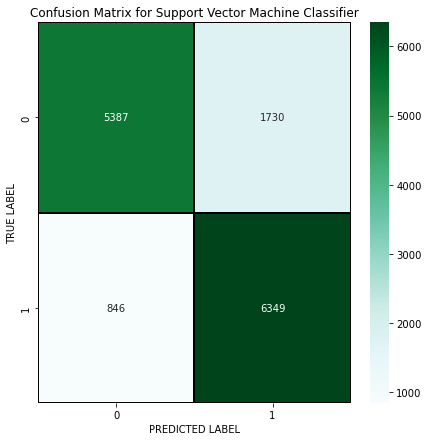

In [93]:
cm = confusion_matrix(Y_test,predsvc)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Support Vector Machine Classifier')
plt.show()

### Cross Validation Score

In [96]:
from sklearn.model_selection import cross_val_score

#cv score for Logistic Regression
print('Logistic Regression',cross_val_score(LOR,X,Y,cv=5).mean())

# cv score for Decision Tree Classifier
print('Decision Tree Classifier',cross_val_score(DTC,X,Y,cv=5).mean())

# cv score for Random Forest Classifier
print('Random Forest Classifier',cross_val_score(RFC,X,Y,cv=5).mean())

# cv score for KNeighbors Classifier
print('KNeighbors Classifier',cross_val_score(KNN,X,Y,cv=5).mean())

# cv score for Support Vector  Classifier
print('Support Vector  Classifier',cross_val_score(svc,X,Y,cv=5).mean())

# cv score for Gradient Boosting Classifier
print('Gradient Boosting Classifier',cross_val_score(XGB,X,Y,cv=5).mean())

Logistic Regression 0.7935481022882392
Decision Tree Classifier 0.8282834371823039
Random Forest Classifier 0.8805825846953669
KNeighbors Classifier 0.8470846874692375
Support Vector  Classifier 0.8172558080976561
Gradient Boosting Classifier 0.8686986681557082


### Hyper Parameter Tuning

In [97]:
parameters = {'criterion':['gini'],
             'max_features':['auto'],
             'n_estimators':[0,200],
             'max_depth':[2,3,4,5,6,8]}

In [99]:
from sklearn.model_selection import GridSearchCV
GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=5)

In [101]:
GCV.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini'], 'max_depth': [2, 3, 4, 5, 6, 8],
                         'max_features': ['auto'], 'n_estimators': [0, 200]})

In [102]:
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 200}

In [104]:
census = RandomForestClassifier (criterion='gini', max_depth=8, max_features='auto', n_estimators=200)
census.fit(X_train, Y_train)
pred = census.predict(X_test)
acc=accuracy_score(Y_test,pred)
print('After HyperParameter tuning we have received an accuracy score of',acc*100)

After HyperParameter tuning we have received an accuracy score of 83.17495807713806


### Plotting ROC and compare AUC for the final model

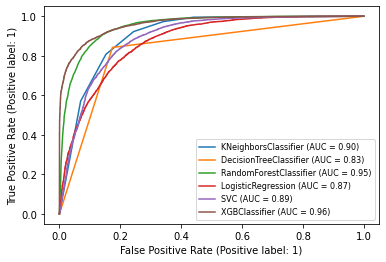

In [109]:
from sklearn import datasets 
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import plot_roc_curve 


disp = plot_roc_curve(KNN,X_test,Y_test)
plot_roc_curve(DTC, X_test, Y_test, ax=disp.ax_)     
plot_roc_curve(RFC, X_test, Y_test, ax=disp.ax_)
plot_roc_curve(LOR, X_test, Y_test, ax=disp.ax_)
plot_roc_curve(svc, X_test, Y_test, ax=disp.ax_)
plot_roc_curve(XGB, X_test, Y_test, ax=disp.ax_)

plt.legend(prop={'size':8}, loc='lower right')
plt.show()

### Saving The Model

In [110]:
import joblib
joblib.dump(census,"Census Income Project.pkl")

['Census Income Project.pkl']